## Project Matplotlib - Crash Course

### Implement all video examples practically.
https://www.youtube.com/watch?v=3Xc3CA655Y4

### For reference and further details, check the official Matplotlib documentation
https://matplotlib.org/stable/api/pyplot_summary.html#axis-configuration



---
# Part 2
### Data source
https://github.com/KeithGalli/matplotlib_tutorial/


# gas_prices Data

### Load Necessary Libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Real World Examples

In [13]:
gas = pd.read_csv('gas_prices.csv')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


# Line Graph

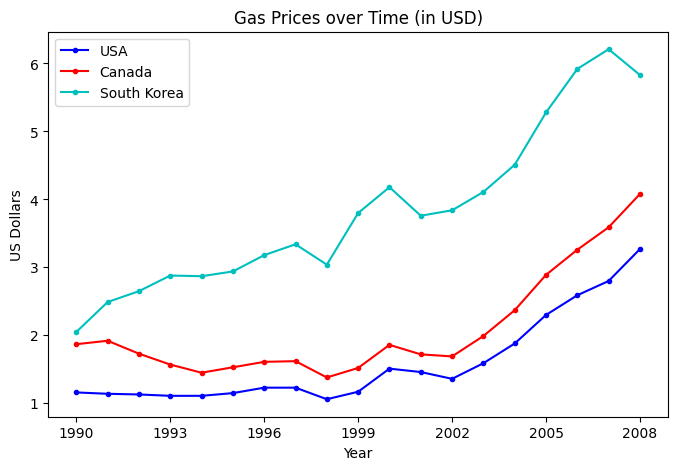

In [14]:
plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)')

plt.plot(gas.Year,gas.USA,'b.-',label='USA')
plt.plot(gas.Year,gas.Canada,'r.-',label='Canada')
plt.plot(gas.Year,gas['South Korea'],'c.-',label='South Korea')

plt.xticks(gas.Year[::3])

plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()
plt.show()

It is easier to analyze data through graphs than to read CSV file values.

Every year gas in Canada is consistently higher than the USA.

The gas in South Korea is even more expensive.



---
To **place a Matplotlib legend outside of the main plot area,** the **bbox_to_anchor argument** within the **legend()** function is used, often in conjunction with **loc.**


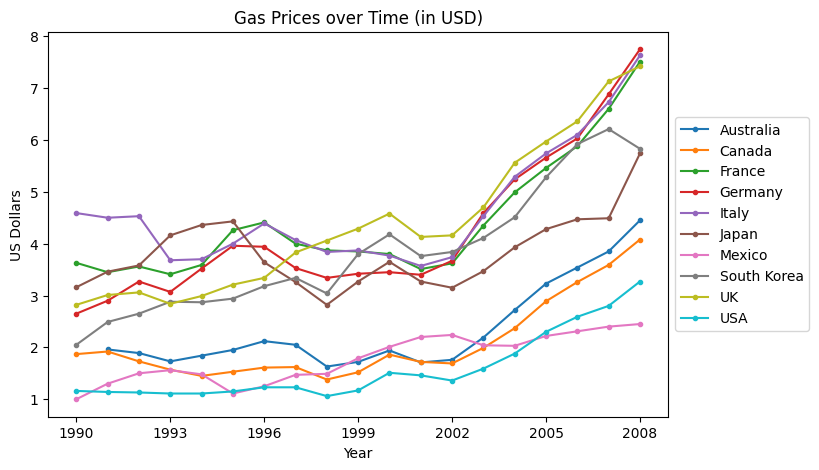

In [15]:
plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)')

for country in gas:
  if country != 'Year':
    plt.plot(gas.Year,gas[country],marker='.',label=country)

plt.xticks(gas.Year[::3])

plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



---
Another Way to plot many values

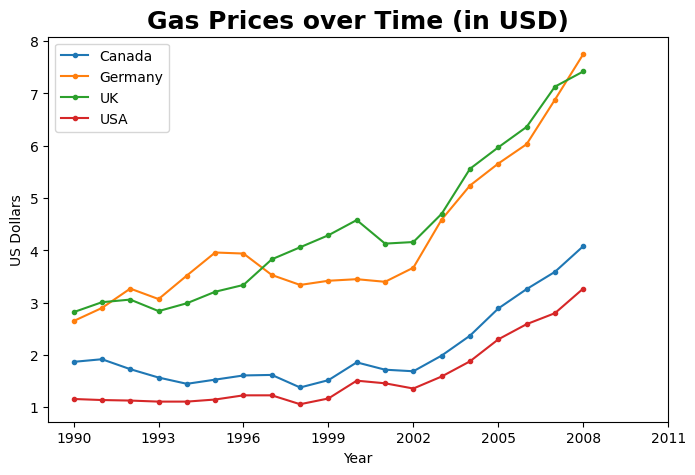

In [16]:
plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)',fontdict={'fontweight':'bold','fontsize':18})

countries_to_look_at = ['Canada','USA','Germany','UK']
for country in gas:
  if country in countries_to_look_at:
    plt.plot(gas.Year,gas[country],marker='.',label=country)

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()

plt.savefig('Gas_price_figure.png',dpi=300)
plt.show()



---
# Fifa Data
### Load Fifa Data

In [6]:
fifa = pd.read_csv('fifa_data.csv')
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Histograms
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

---



**Matplotlib** automatically chooses **bin ranges**, giving a general but less precise histogram

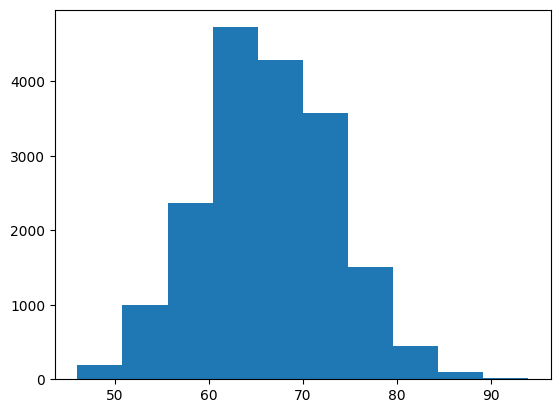

In [8]:
plt.hist(fifa.Overall)

plt.show()

After **Custom bins** [40,50,60,70,80,90,100] create clear, evenly spaced intervals (every 10 points), making the chart easier to read and interpret

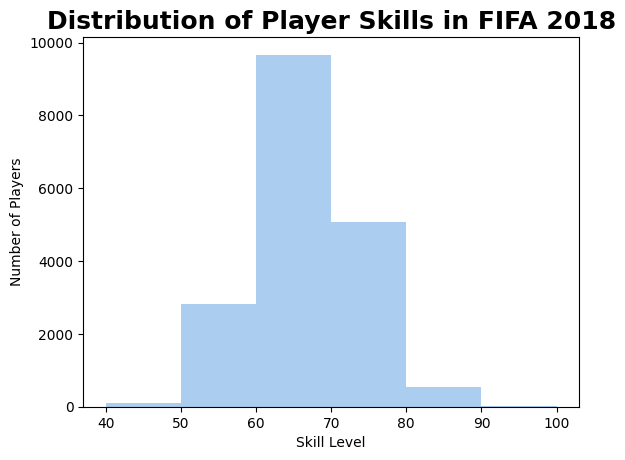

In [9]:
# Define bin edges every 10 points from 40 to 100
bins = [40,50,60,70,80,90,100]

# Plot histogram of overall ratings using the specified bins
plt.hist(fifa.Overall, bins=bins,color='#abcdef')

# Set x-axis ticks to match the bin edges for clarity
plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018',fontdict={'fontweight':'bold','fontsize':18})

plt.show()



---

# Pie Charts
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

---



### First Pie Graph

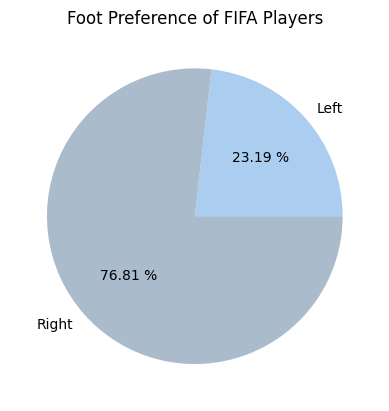

In [10]:
left = fifa.loc[fifa['Preferred Foot']=='Left'].count().iloc[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count().iloc[0]

labels = ['Left','Right']
colors = ['#abcdef','#aabbcc']
plt.pie([left,right],labels=labels,colors=colors,autopct='%.2f %%') # autopct='%.2f': Display percentage values on each pie slice, formatted with two decimal places.

plt.title('Foot Preference of FIFA Players')

plt.show()



---

### Second Pie Graph

In [11]:
fifa.Weight

,Weight
0,159lbs
1,183lbs
2,150lbs
3,168lbs
4,154lbs
...,...
18202,134lbs
18203,170lbs
18204,148lbs
18205,154lbs


In [40]:
# Remove the 'lbs' text from weight values, keeping only the numeric part.
# .strip() removes specified characters (or whitespace by default) from both ends of a string.
fifa.Weight = [x.strip('lbs') if type(x)==str else x for x in fifa.Weight ]
fifa.Weight

,Weight
0,159.0
1,183.0
2,150.0
3,168.0
4,154.0
...,...
18202,134.0
18203,170.0
18204,148.0
18205,154.0


In [18]:
fifa.Weight[0]

'159'

In [35]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
fifa.Weight[0]

np.float64(159.0)

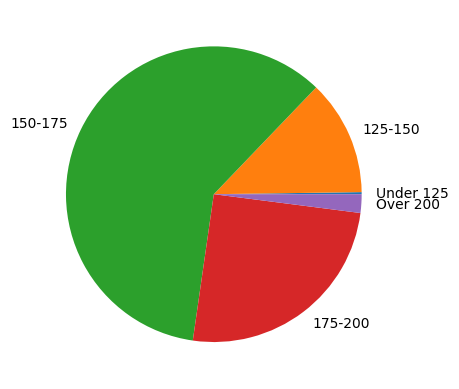

In [46]:
light = fifa.loc[fifa.Weight<125].count().iloc[0]
light_medium = fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count().iloc[0]
medium = fifa[(fifa.Weight>=150)&(fifa.Weight<175)].count().iloc[0]
medium_heavy = fifa[(fifa.Weight>=175)&(fifa.Weight<200)].count().iloc[0]
heavy = fifa[(fifa.Weight>=200)].count().iloc[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['Under 125','125-150','150-175','175-200','Over 200']

plt.pie(weights,labels=labels)

plt.show()

added three improvements to make the pie chart clearer and easier to read:

* explode → separates selected slices from the center to highlight them.

* pctdistance=0.8 → moves percentage labels slightly outward for better visibility.

* plt.style.use('ggplot') → applies a clean, professional ggplot style to the chart.

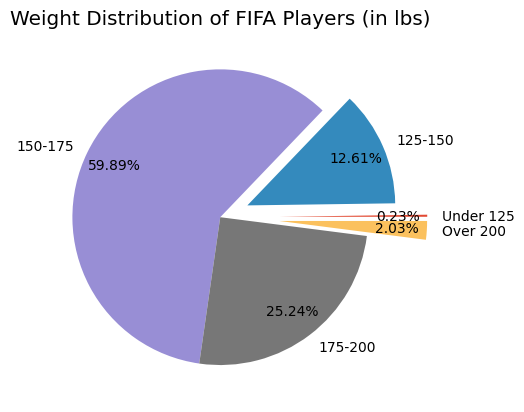

In [48]:
plt.style.use('ggplot')

light = fifa.loc[fifa.Weight<125].count().iloc[0]
light_medium = fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count().iloc[0]
medium = fifa[(fifa.Weight>=150)&(fifa.Weight<175)].count().iloc[0]
medium_heavy = fifa[(fifa.Weight>=175)&(fifa.Weight<200)].count().iloc[0]
heavy = fifa[(fifa.Weight>=200)].count().iloc[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['Under 125','125-150','150-175','175-200','Over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight Distribution of FIFA Players (in lbs)')

plt.pie(weights,labels=labels,autopct='%.2f%%',pctdistance=0.8,explode=explode)

plt.show()



---

# Box and Whisker Plots
A Box and Whisker Plot (or Box Plot) displays the distribution of data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
It helps visualize data spread, detect outliers, and compare distributions across groups.

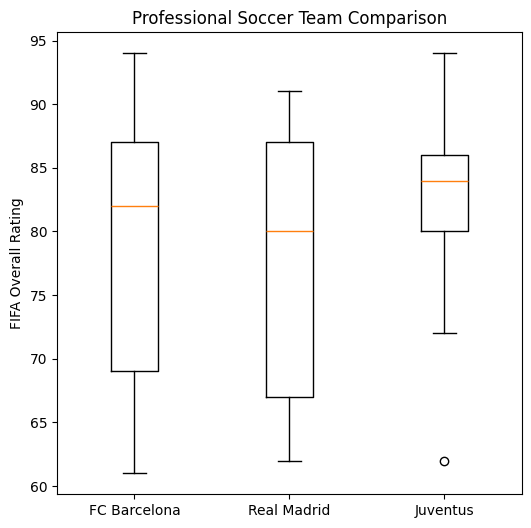

In [64]:
plt.style.use('default')

plt.figure(figsize=(6,6))

# Select and display the 'Overall' ratings of all players who play for FC Barcelona.
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
# Select and display the 'Overall' ratings of all players who play for Real Madrid.
madrid = fifa.loc[fifa.Club=='Real Madrid']['Overall']
# Select and display the 'Overall' ratings of all players who play for Juventus.
Juventus= fifa.loc[fifa.Club=='Juventus']['Overall']


labels = ['FC Barcelona','Real Madrid','Juventus']

plt.boxplot([barcelona, madrid, Juventus], tick_labels=labels)


plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()

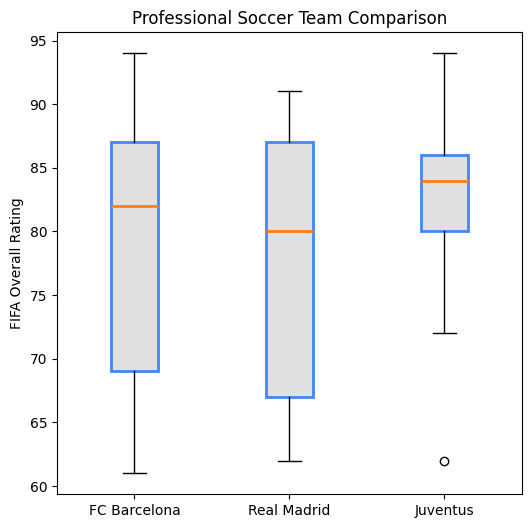

In [69]:
plt.style.use('default')

plt.figure(figsize=(6,6))

# Select and display the 'Overall' ratings of all players who play for FC Barcelona.
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
# Select and display the 'Overall' ratings of all players who play for Real Madrid.
madrid = fifa.loc[fifa.Club=='Real Madrid']['Overall']
# Select and display the 'Overall' ratings of all players who play for Juventus.
Juventus= fifa.loc[fifa.Club=='Juventus']['Overall']


labels = ['FC Barcelona','Real Madrid','Juventus']

boxes = plt.boxplot([barcelona, madrid, Juventus], tick_labels=labels,patch_artist=True,medianprops={'linewidth':2})
# patch_artist=True → enables coloring the boxes (fills with facecolor)
# medianprops={'linewidth':2} → makes the median line thicker for better visibility

for box in boxes['boxes']:
  # Set edge color
  box.set(color='#4286f4',linewidth=2)

  # Change Fill Color
  box.set(facecolor='#e0e0e0')

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()